# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive) 

# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [6]:
import pandas as pd
from google.colab import files

In [7]:
uploaded = files.upload()

Saving data.csv to data.csv


In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('data.csv')
df


,x1,x2,y
0,38,80,1
1,48,19,0
2,49,8,0
3,34,47,1
4,73,7,0
5,56,20,0
6,55,25,0
7,7,19,0
8,29,11,0
9,91,88,1


In [15]:
X1=df['x1'].values.tolist()
X2=df['x2'].values.tolist()
Y=df['y'].values.tolist()
print(X1)
print(X2)
print(Y)


[38, 48, 49, 34, 73, 56, 55, 7, 29, 91, 48, 52, 52, 6, 22, 15, 8, 54, 39, 69, 35, 32, 34, 5, 37, 12, 38, 42, 61, 4, 1, 42, 19, 77, 64, 84, 83, 60, 66, 10, 29, 75, 91, 27, 36, 40, 75, 46, 38, 77, 50, 99, 82, 7, 84, 65, 75, 62, 47, 66]
[80, 19, 8, 47, 7, 20, 25, 19, 11, 88, 51, 99, 99, 52, 36, 32, 41, 74, 23, 78, 11, 88, 90, 89, 95, 96, 62, 85, 60, 21, 63, 71, 35, 4, 87, 28, 43, 4, 63, 37, 10, 17, 77, 35, 36, 50, 87, 10, 49, 96, 87, 48, 23, 53, 1, 7, 59, 4, 43, 77]
[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]


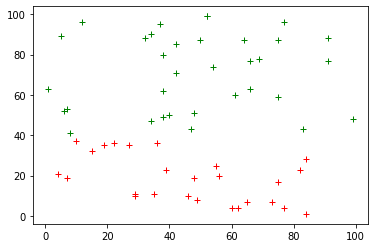

In [16]:
import matplotlib.pyplot as plt
import math
import random
from IPython import display
from scipy.signal import savgol_filter
plt.figure()
for i in range(len(Y)):
    if Y[i]==0:
        plt.plot(X1[i],X2[i], "r+")
    else:
        plt.plot(X1[i],X2[i],"g+")
plt.show()

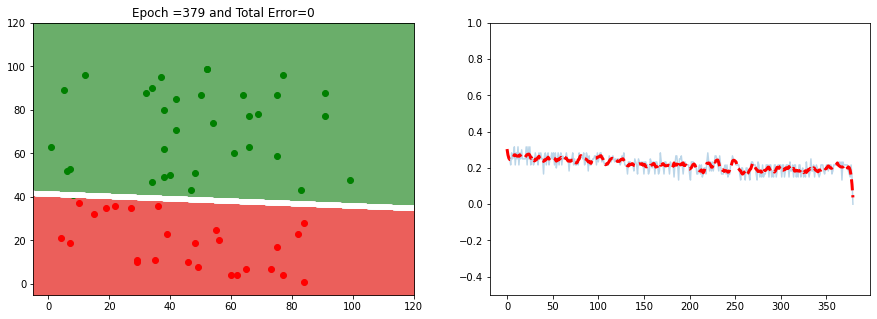

Epoch: 379 Loss: 0.0 and y=[41.61348213618429, 34.773012454500844] and x=755.4280859472938


In [17]:
W=[random.random(), random.random()]
b=random.random()
lr=0.5

theta=0.5
epoch=0
count=0
loss=[]
while count < len(X1):
    total_error=0
    for i in range(len(X1)):
        ws=W[0]*X1[i]+W[1]*X2[i]+b
        pred=0
        if ws > theta:
            pred=1
        
        error = Y[i]-pred
        if error!=0:
            count=0
            total_error+=math.sqrt(error**2)
            W[0]+=lr*error*X1[i]
            W[1]+=lr*error*X2[i]
            b+=lr*error
        else:
            count+=1
    loss.append(1/len(X1)*total_error)
    plt.figure(figsize=(15,5))
    
    display.clear_output(wait=True)
    plt.subplot(1,2,1)
    for i in range(len(Y)):
        if Y[i]==0:
            plt.plot(X1[i],X2[i], "ro")
        else:
            plt.plot(X1[i],X2[i],"go")
        plt.xlim(-5,120)
        plt.ylim(-5,120)
        xint=(theta-b)/W[0]
        yint=(theta-b)/W[1]
        slope=-yint/xint
        x=plt.xlim()
        y=[]
        for i in x:
            y.append(slope*i+yint)
        plt.plot(x,y, 'w-',linewidth=5)
        plt.fill_between(x=[-5,120],y1=-5,y2=120, color='g',alpha=.01)
        plt.fill_between(x=[-5,120],y1=-5,y2=y, color='#F05F5F',alpha=.4)
        #plt.fill_between(x=[-5,120],y1=y,y2=-5, color='g')
        
    plt.title(f"Epoch ={epoch} and Total Error={total_error}")
    plt.subplot(1,2,2)
    plt.ylim([-.5,1])
    plt.plot(loss, alpha=0.3)
    if epoch > 10:
        avg = savgol_filter(loss, 11, 3) # window size 51, polynomial order 3
        plt.plot(avg, 'r--', lw=3)
    
    plt.show()
    print(f"Epoch: {epoch} Loss: {loss[-1]} and y={y} and x={xint}")
    epoch+=1